In [301]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
sns.set_theme(style="ticks")
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Data Cleaning:

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.rename(columns={'DEATH_EVENT':'death_event'})

# Check for NaN values:
if df.isnull().values.any():
    print('NaN values found.')

# Check for proper one-hot encoding of categorical variables:
cat_var_list = ['anaemia','diabetes','high_blood_pressure','sex','smoking','death_event']
for cat_var in cat_var_list:
    if df[cat_var].nunique() != 2:
        print(cat_var)

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


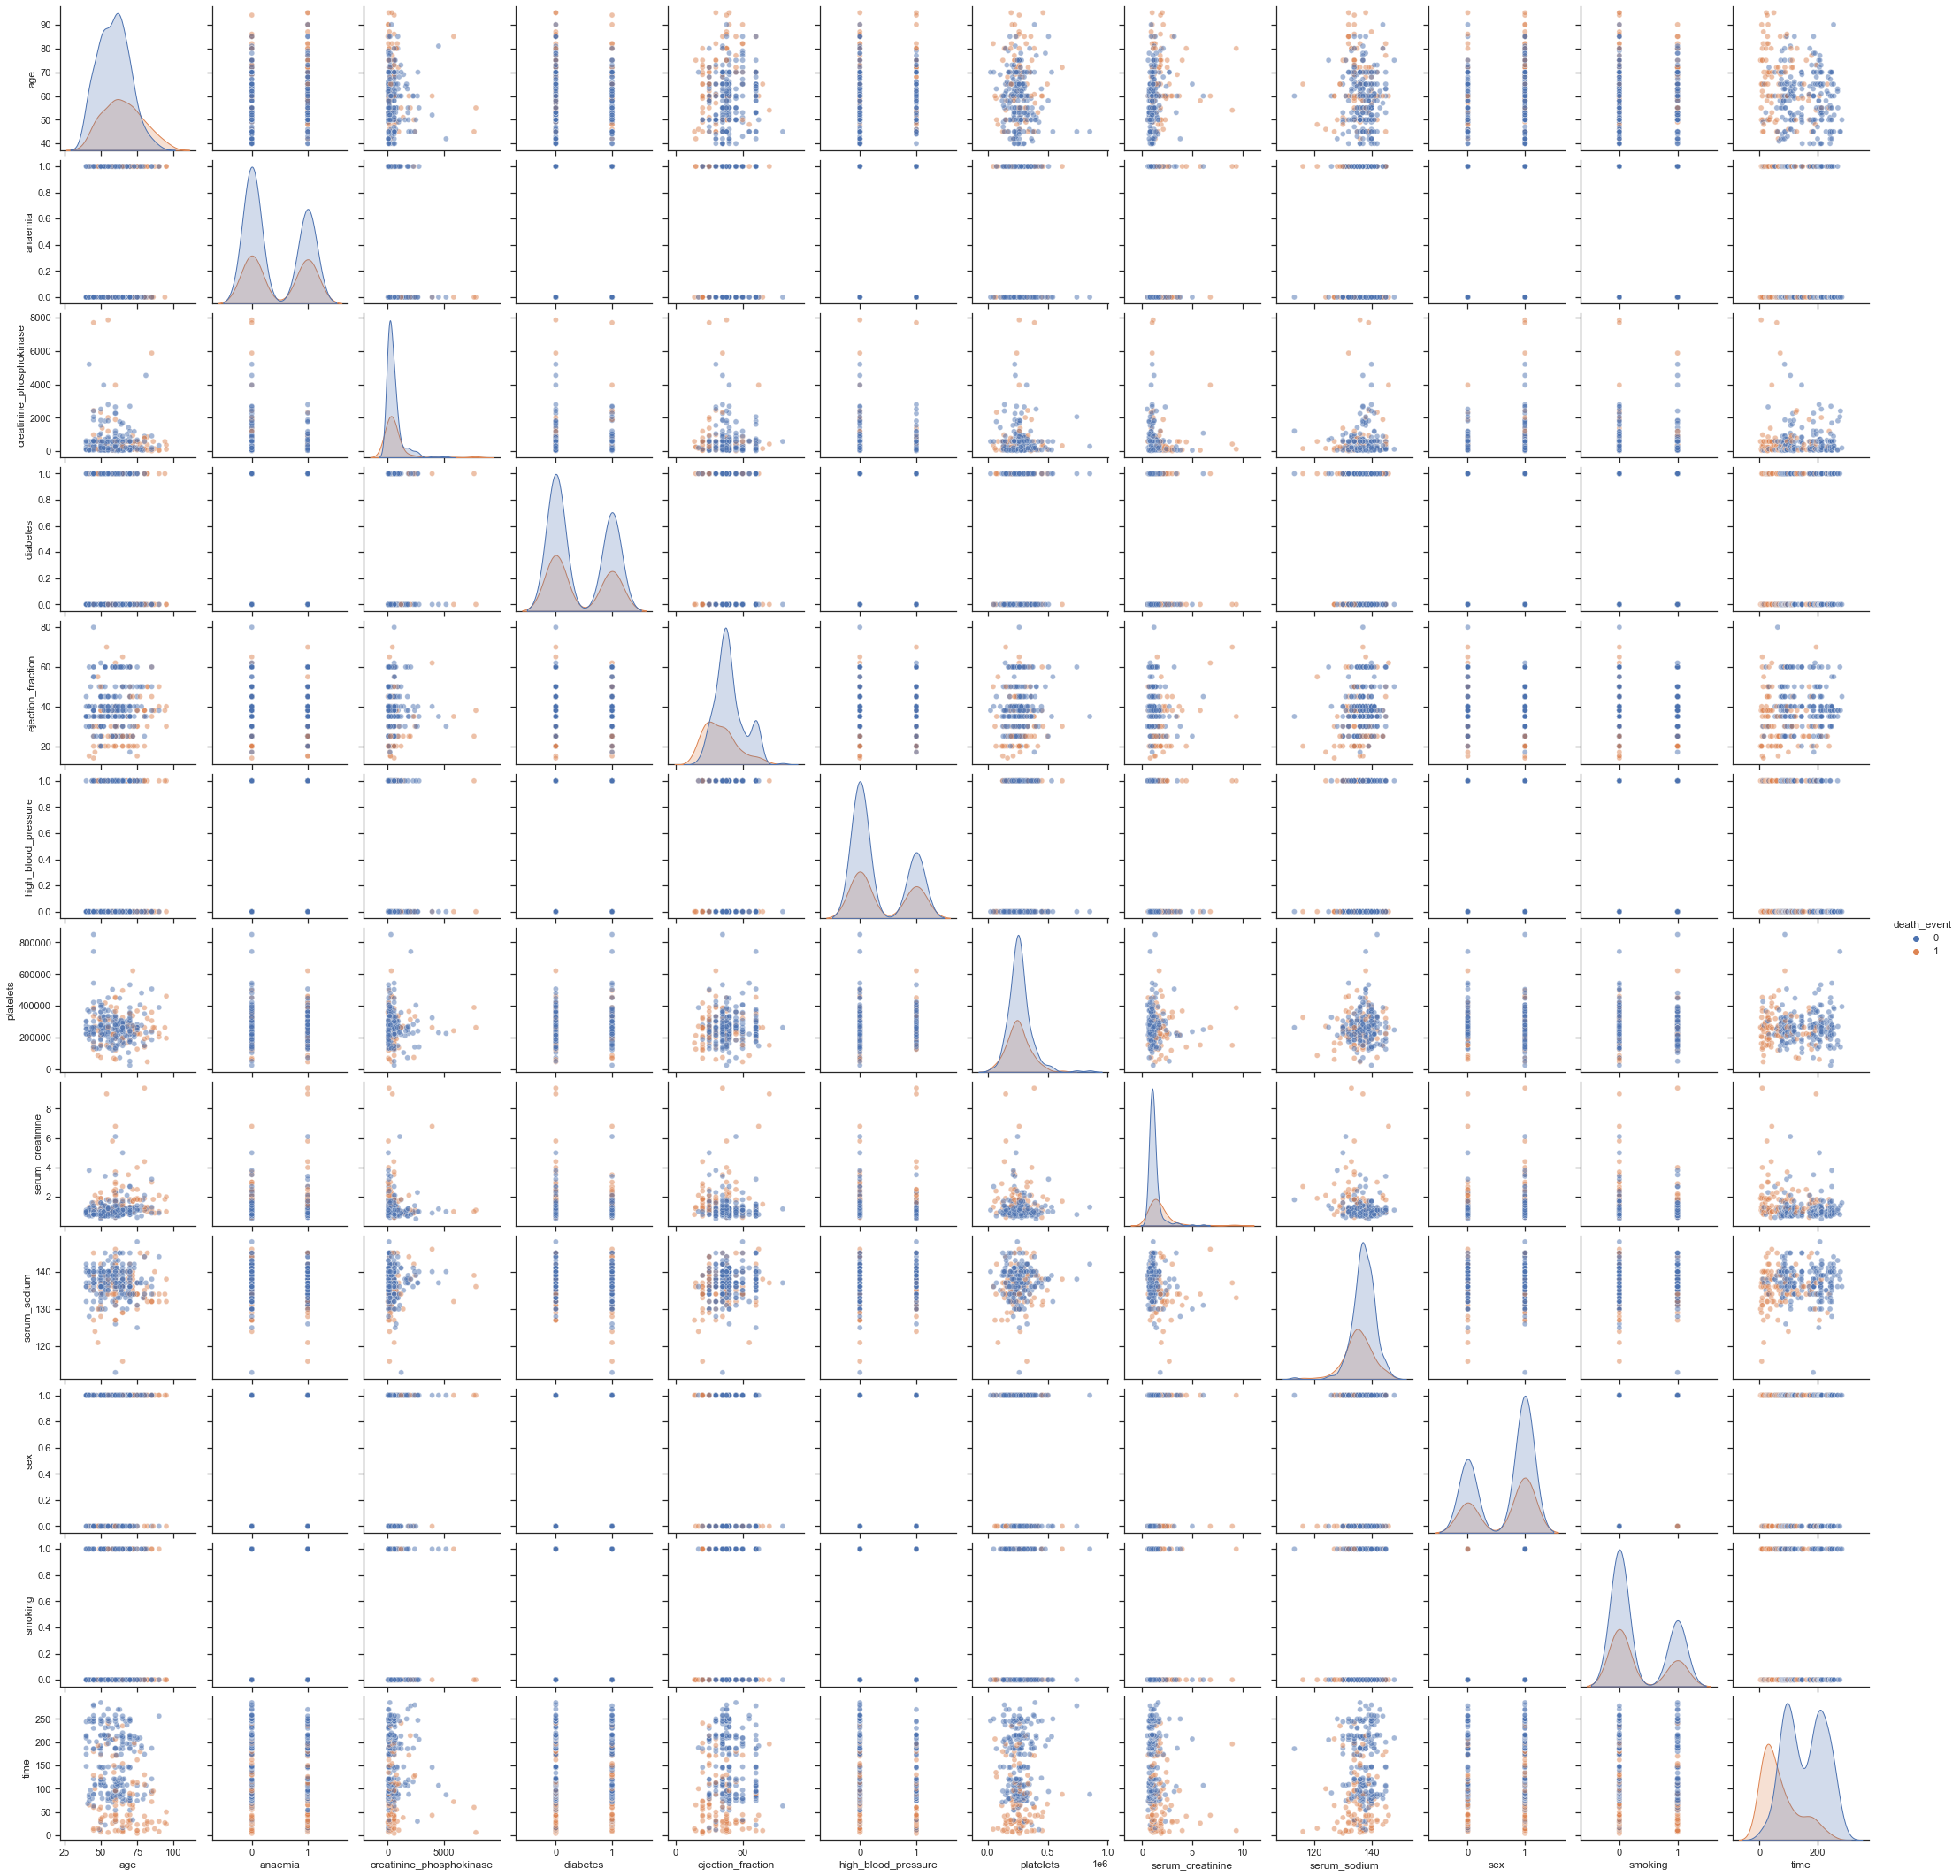

In [5]:
# Define X as the numpy array of data:
df_PCA = df.loc[:,df.columns != 'death_event']
X = df_PCA.to_numpy()
# df_PCA.head()

# Show scatterplot matrix of data labeled by death_event:
ax = sns.pairplot(df, hue='death_event', plot_kws={'alpha':0.5})

### PCA:

In [6]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002

def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [7]:
# normc(M) normalizes the columns of M to a length of 1.

def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [8]:
X_mean = np.mean(X,axis=1)
n = X[0].size

arr_mean = np.repeat(np.reshape(X_mean, (X_mean.size,1)), X.shape[1], axis=1)
# print(arr_mean.shape)

# Create mean-subtracted array:
A = np.subtract(X, arr_mean)
# print(A.shape)

eigvals, V_old = np.linalg.eig(np.matmul(A.T,A))
V, D = eigsort(V_old, eigvals)

U = np.matmul(A,V) # U = A*V
U = normc(U) # Normalize
# print(U.shape)
df_U = pd.DataFrame(U, columns = df_PCA.columns)
df_U.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.054563,-0.004045,0.069570,0.061222,0.102664,-0.006260,0.013510,-0.013908,-0.002204,-0.090491,0.081680,0.042376
1,-0.054092,-0.432411,0.101539,-0.003015,-0.027382,-0.006554,-0.012306,-0.004152,0.041344,0.025111,0.047470,-0.020045
2,-0.033358,0.010327,0.034760,0.104735,0.069230,0.038343,-0.013600,-0.093020,-0.035020,0.009490,-0.048581,0.061494
3,-0.043245,0.017578,0.047633,0.084933,0.028663,0.120093,0.033675,-0.013849,0.058944,0.063287,0.070196,-0.034319
4,-0.067341,0.027432,0.084671,0.014067,0.083121,-0.004779,0.071179,0.083962,-0.017926,0.086740,-0.039184,-0.063172


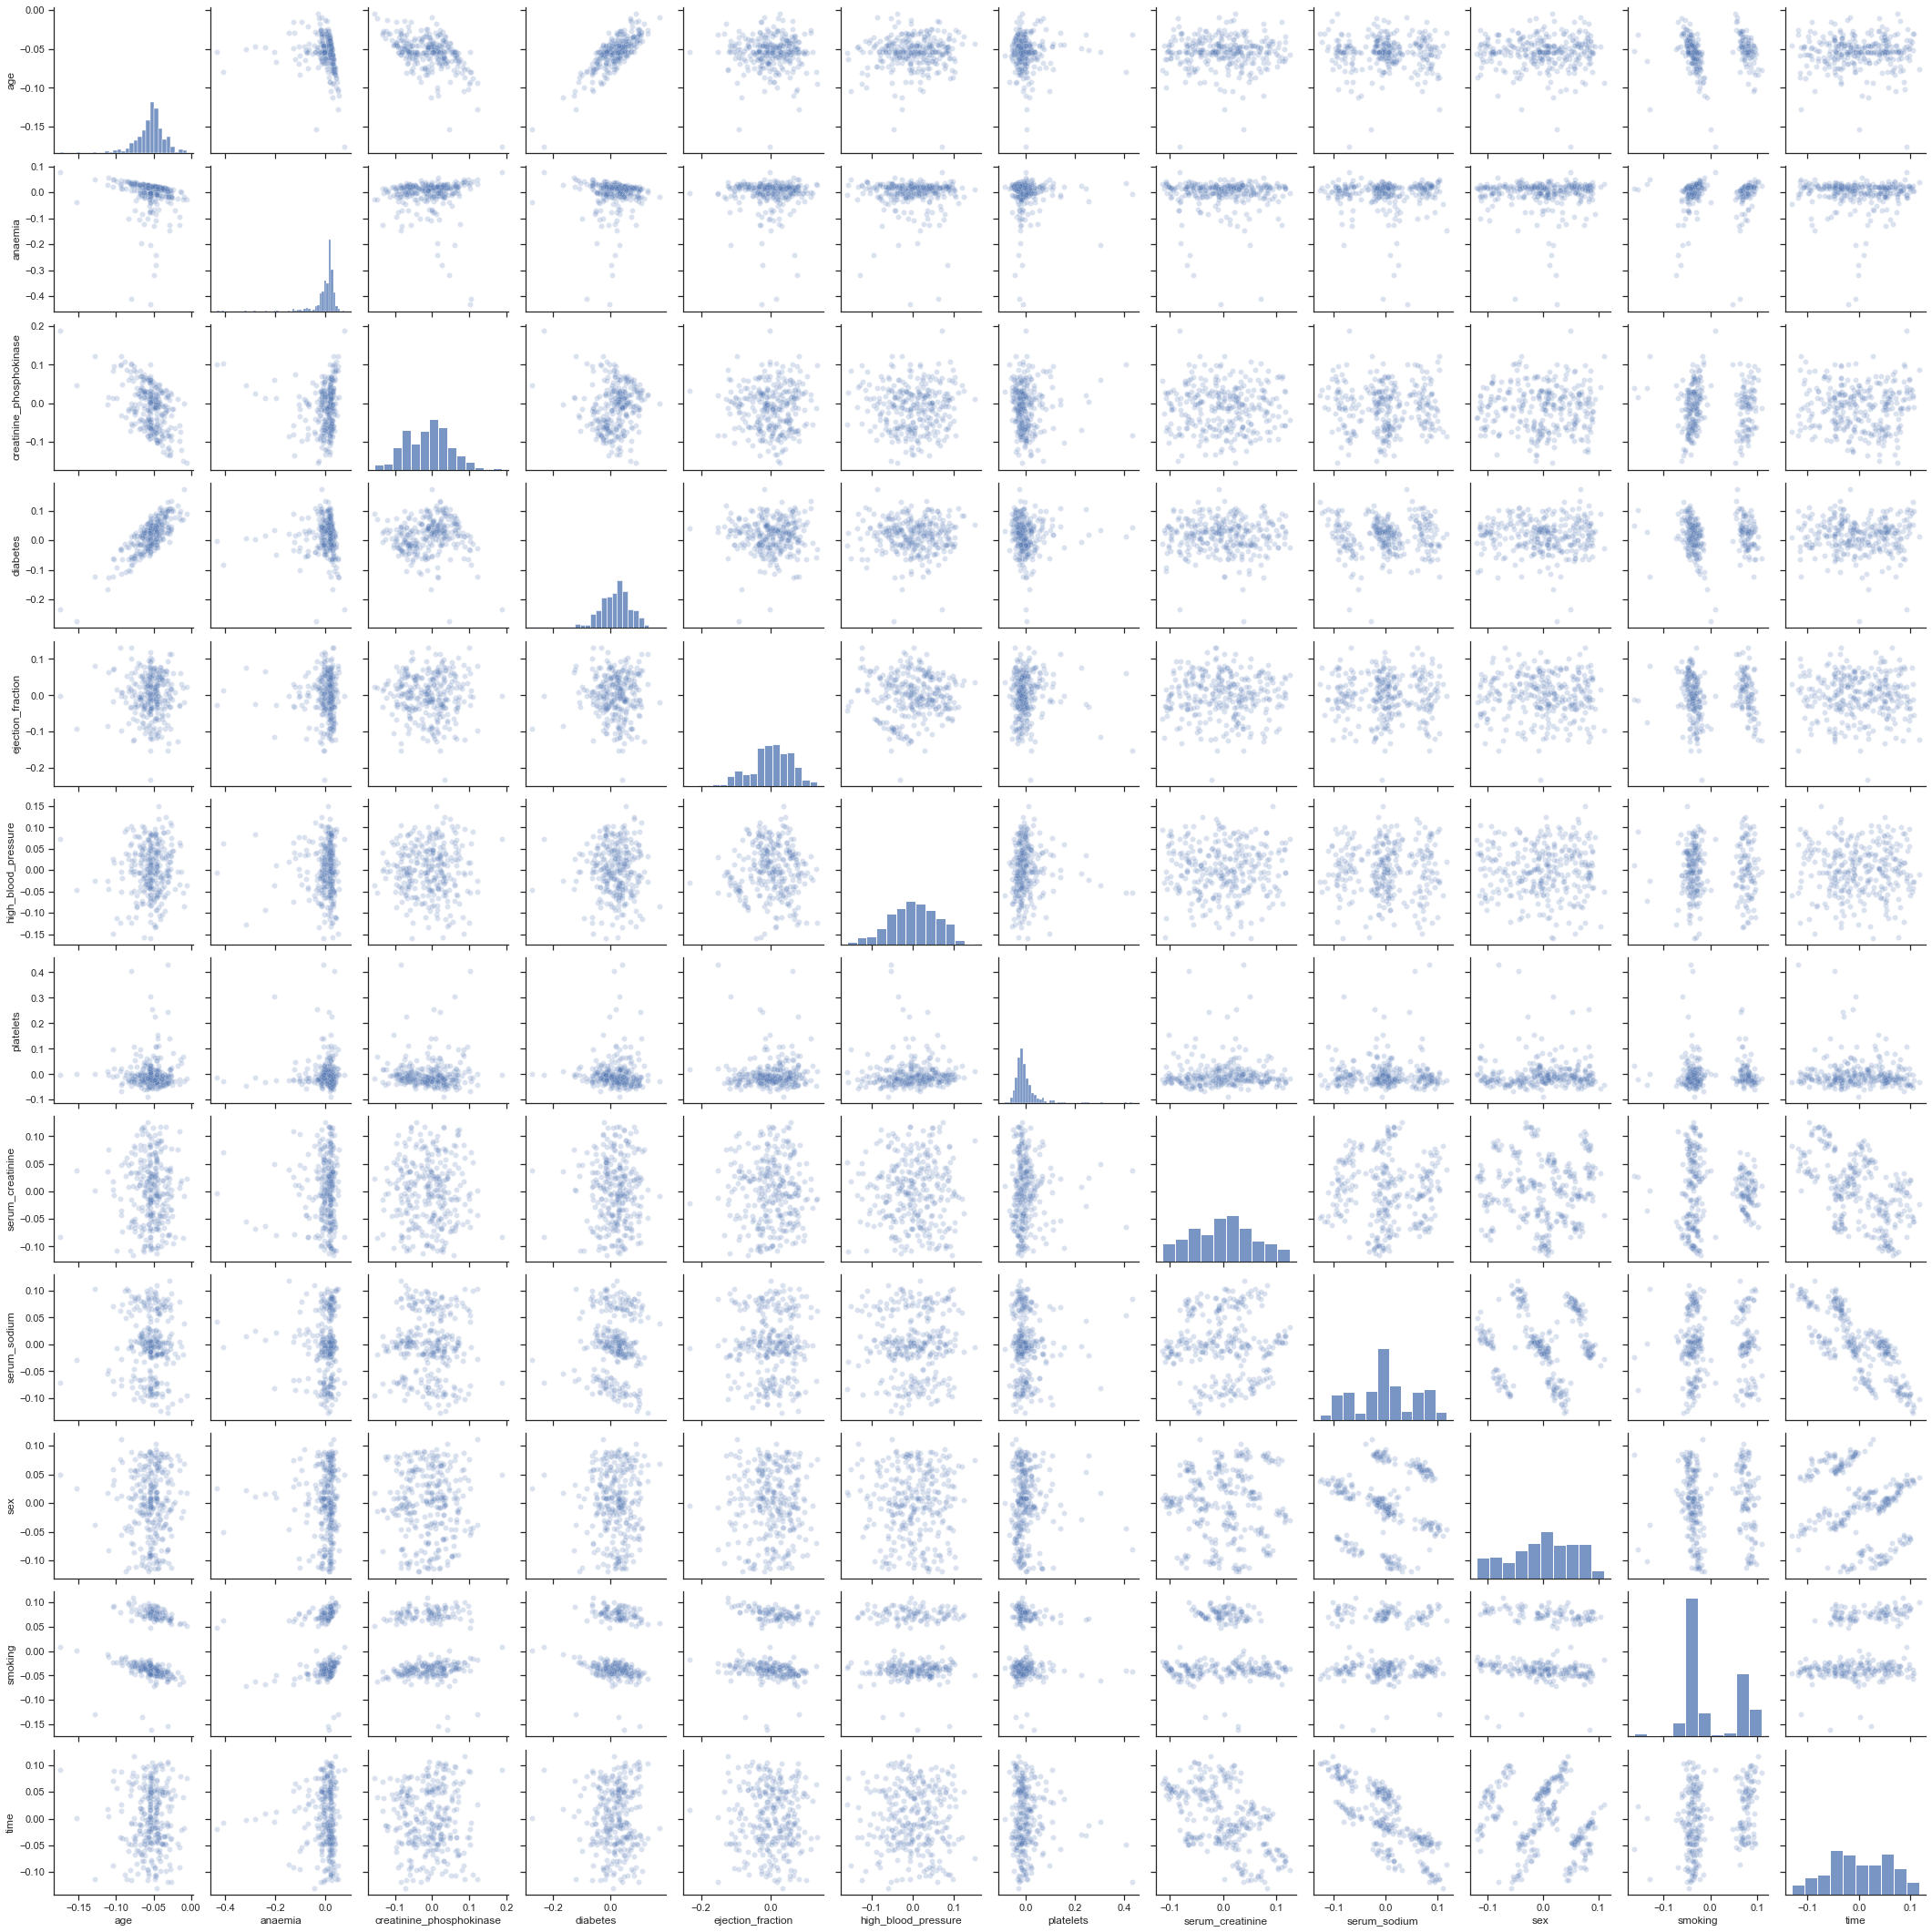

In [9]:
# Scatter plot matrix of PC's:
ax = sns.pairplot(df_U, plot_kws={'alpha':0.2})

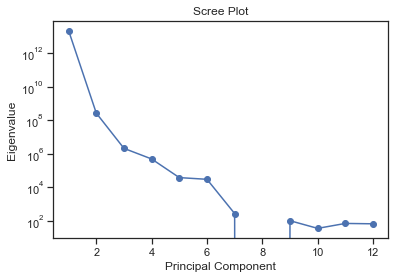

In [10]:
# Scree Plot of Eigenvalues and PC's:
n_PCA = X.shape[1]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(n_PCA)+1, eigvals, 'bo-')
ax.set_yscale('log')
ax.set(title="Scree Plot", xlabel="Principal Component", ylabel="Eigenvalue")

plt.show()

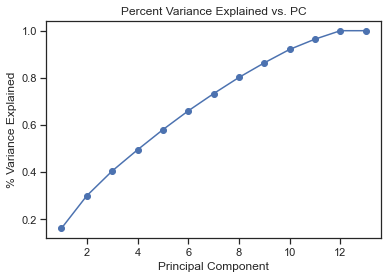

In [316]:
# Percent Variance Explained vs. PC:
eigvals_sum = np.sum(np.diagonal(D))
pve = np.ones(np.diagonal(D).size)
for i in range(pve.size):
    pve[i] = np.sum(np.diagonal(D)[0:i+1])/eigvals_sum

fig = plt.figure(2)
ax = fig.add_subplot(1,1,1)
ax.plot(np.linspace(1,U[0,:].size,U[0,:].size), pve, 'bo-')
#ax.set_yscale('log')
ax.set(title="Percent Variance Explained vs. PC", xlabel="Principal Component", ylabel="% Variance Explained")

plt.show()


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [287]:
df_PCA = df
X = df_PCA.to_numpy()

X_unscaled = df_PCA.to_numpy()
scaler = StandardScaler().fit(X)
X = scaler.transform(X_unscaled)

X_mean = np.mean(X,axis=1)
n = X[0].size

mean_arr = np.mean(X,1).reshape(-1,1)
A = X - np.matlib.repmat(mean_arr,1,n)

for i in range(A.shape[1]):
    std = np.std(A[:,i])
    A[:,i] = A[:,i] / std
    
cov = (np.reciprocal(n)) * np.dot(A, A.T)

eigvals, V_old = np.linalg.eig( np.dot(A.T, A))
V, D = eigsort(V_old, eigvals)

U = np.matmul(A,V) # U = A*V
U = normc(U) # Normalize
# print(U.shape)
df_U = pd.DataFrame(U, columns = df_PCA.columns)
print(eigvals, V_old)

[ 6.25169624e+02 -2.37587727e-14  5.37898984e+02  1.39125881e+02
  4.08496378e+02  1.69147177e+02  2.21945731e+02  2.40672823e+02
  3.49666137e+02  3.32398478e+02  3.10515124e+02  2.84187674e+02
  2.67775989e+02] [[ 0.33849606 -0.26764466 -0.05828296 -0.22380742  0.33596793 -0.06001068
  -0.08693633 -0.43126247  0.02163695  0.15794215 -0.25567588 -0.15546692
   0.57907263]
 [ 0.10857704 -0.27932611 -0.27130674 -0.11270101  0.3249317  -0.03571011
  -0.41633375  0.07265027  0.25434995 -0.20041577  0.55499847  0.34485334
  -0.0812644 ]
 [-0.07859452 -0.2775299   0.16956118 -0.22778067 -0.45484014 -0.0996138
  -0.42342014  0.06575015 -0.26855689  0.57865631  0.1674426   0.02113106
   0.01747552]
 [-0.0964605  -0.28349309 -0.24303865 -0.22277731 -0.46599467  0.06250453
   0.26956687  0.22939003  0.24007578 -0.29908177  0.21394751 -0.34700619
   0.37684542]
 [-0.27023363 -0.27628047 -0.25743575  0.2488613   0.30015301  0.04556082
  -0.11663019  0.5922846   0.13386243  0.27401565 -0.40073776 

In [288]:
#ax = sns.pairplot(pd.DataFrame(U), hue=-1, plot_kws={'alpha':0.2}) # alpha is for transparency

In [341]:
death_ind = df.index[df['death_event'] == 1].tolist()
nodeath_ind = df.index[df['death_event'] == 0].tolist()

smoke_ind = df.index[df['smoking'] == 1].tolist()
nosmoke_ind = df.index[df['smoking'] == 0].tolist()

a_ind =  df.index[df['anaemia'] == 1].tolist()
noa_ind = df.index[df['anaemia'] == 0].tolist()

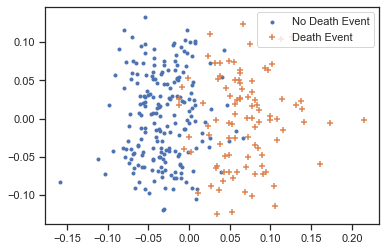

In [337]:
plt.scatter(U[nodeath_ind,0],U[nodeath_ind,1], marker='.',label="No Death Event")
plt.scatter(U[death_ind,0], U[death_ind,1], marker='+',label="Death Event")
plt.legend()
plt.show()

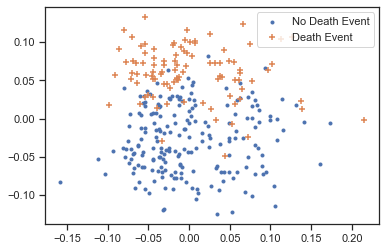

In [339]:
plt.scatter(U[nosmoke_ind,0],U[nosmoke_ind,1], marker='.',label="No Death Event")
plt.scatter(U[smoke_ind,0], U[smoke_ind,1], marker='+',label="Death Event")
plt.legend()
plt.show()

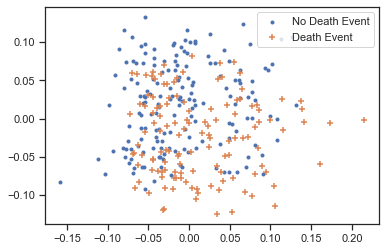

In [342]:
plt.scatter(U[noa_ind,0],U[noa_ind,1], marker='.',label="No Death Event")
plt.scatter(U[a_ind,0], U[a_ind,1], marker='+',label="Death Event")
plt.legend()
plt.show()

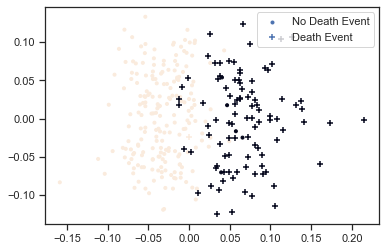

In [304]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.scatter(U[nodeath_ind,0],U[nodeath_ind,1], c=kmeans.labels_[nodeath_ind],marker='.',label="No Death Event")
plt.scatter(U[death_ind,0], U[death_ind,1], c=kmeans.labels_[death_ind],marker='+',label="Death Event")
plt.legend()
plt.show()

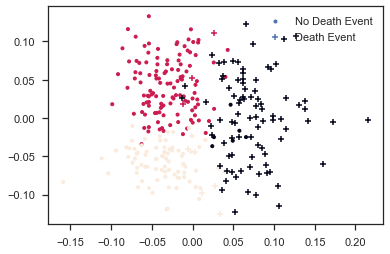

In [299]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
plt.scatter(U[nodeath_ind,0], U[nodeath_ind,1], c=kmeans.labels_[nodeath_ind],marker='.',label="No Death Event")
plt.scatter(U[death_ind,0], U[death_ind,1], c=kmeans.labels_[death_ind],marker='+',label="Death Event")
plt.legend()
plt.show()

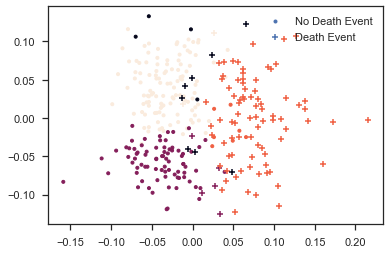

In [300]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
plt.scatter(U[nodeath_ind,0], U[nodeath_ind,1], c=kmeans.labels_[nodeath_ind],marker='.',label="No Death Event")
plt.scatter(U[death_ind,0], U[death_ind,1], c=kmeans.labels_[death_ind],marker='+',label="Death Event")
plt.legend()
plt.show()

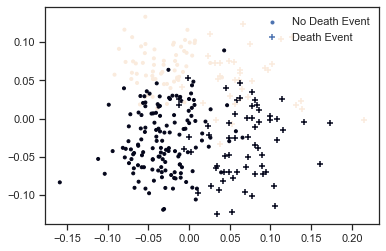

In [293]:
spectral = SpectralClustering(n_clusters=2, random_state=0).fit(X)
plt.scatter(U[nodeath_ind,0], U[nodeath_ind,1], c=spectral.labels_[nodeath_ind],marker='.',label="No Death Event")
plt.scatter(U[death_ind,0], U[death_ind,1], c=spectral.labels_[death_ind],marker='+',label="Death Event")
plt.legend()
plt.show()

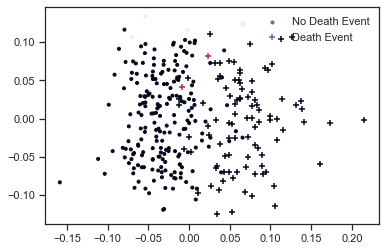

In [294]:
spectral = SpectralClustering(n_clusters=3, random_state=0).fit(X)
plt.scatter(U[nodeath_ind,0], U[nodeath_ind,1], c=spectral.labels_[nodeath_ind],marker='.',label="No Death Event")
plt.scatter(U[death_ind,0], U[death_ind,1], c=spectral.labels_[death_ind],marker='+',label="Death Event")
plt.legend()
plt.show()

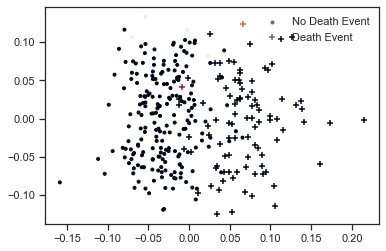

In [295]:
spectral = SpectralClustering(n_clusters=4, random_state=0).fit(X)
plt.scatter(U[nodeath_ind,0], U[nodeath_ind,1], c=spectral.labels_[nodeath_ind],marker='.',label="No Death Event")
plt.scatter(U[death_ind,0], U[death_ind,1], c=spectral.labels_[death_ind],marker='+',label="Death Event")
plt.legend()
plt.show()

[0. 1.]


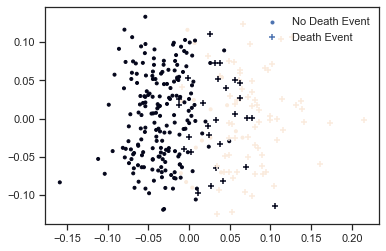

In [296]:
Y = X[:,-1].copy()
Y[Y < 0] = 0
Y[Y > 0] = 1
print(np.unique(Y))
clf = LogisticRegression(random_state=0).fit(X[:,:-1], Y)
logreg = clf.predict(X[:, :-1])
plt.scatter(U[nodeath_ind,0], U[nodeath_ind,1], c=logreg[nodeath_ind],marker='.',label="No Death Event")
plt.scatter(U[death_ind,0], U[death_ind,1], c=logreg[death_ind],marker='+',label="Death Event")
plt.legend()
plt.show()

In [305]:
eigvals

array([ 6.25169624e+02, -2.37587727e-14,  5.37898984e+02,  1.39125881e+02,
        4.08496378e+02,  1.69147177e+02,  2.21945731e+02,  2.40672823e+02,
        3.49666137e+02,  3.32398478e+02,  3.10515124e+02,  2.84187674e+02,
        2.67775989e+02])

In [306]:
(np.sort(eigvals)[-1] + np.sort(eigvals)[-2])  / np.sum(np.sort(eigvals))

0.2992201204936486

In [331]:
d_ratio = D.diagonal() / np.sum(D.diagonal())

In [260]:
U

array([[ 0.09432947, -0.08288482, -0.03338711, ...,  0.00837333,
        -0.04335589,  0.08251444],
       [ 0.06768012, -0.10651319, -0.06084916, ...,  0.43005773,
        -0.07006937, -0.04961675],
       [ 0.10829981, -0.06759052,  0.11160258, ..., -0.00440071,
        -0.02935193,  0.04500372],
       ...,
       [-0.06541068,  0.08285552, -0.06740548, ...,  0.06615032,
        -0.07644697, -0.10839861],
       [-0.04541689,  0.10309691,  0.08379135, ...,  0.10807568,
        -0.05640506, -0.08748196],
       [-0.0485417 ,  0.10374894,  0.08057124, ..., -0.03170028,
        -0.05953739, -0.06468806]])

In [309]:
D.diagonal()

array([ 6.25169624e+02,  5.37898984e+02,  4.08496378e+02,  3.49666137e+02,
        3.32398478e+02,  3.10515124e+02,  2.84187674e+02,  2.67775989e+02,
        2.40672823e+02,  2.21945731e+02,  1.69147177e+02,  1.39125881e+02,
       -2.37587727e-14])

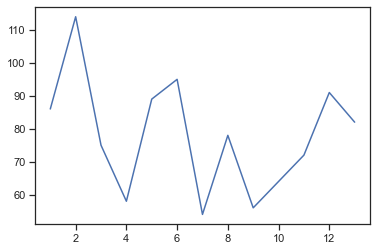

In [358]:
plt.plot(np.linspace(1,13,13), np.sum(np.argsort(abs(V[:,:]),axis=0),axis=1))

In [343]:
V

array([[ 0.33849606, -0.05828296,  0.33596793,  0.02163695,  0.15794215,
        -0.25567588, -0.15546692,  0.57907263, -0.43126247, -0.08693633,
        -0.06001068, -0.22380742, -0.26764466],
       [ 0.10857704, -0.27130674,  0.3249317 ,  0.25434995, -0.20041577,
         0.55499847,  0.34485334, -0.0812644 ,  0.07265027, -0.41633375,
        -0.03571011, -0.11270101, -0.27932611],
       [-0.07859452,  0.16956118, -0.45484014, -0.26855689,  0.57865631,
         0.1674426 ,  0.02113106,  0.01747552,  0.06575015, -0.42342014,
        -0.0996138 , -0.22778067, -0.2775299 ],
       [-0.0964605 , -0.24303865, -0.46599467,  0.24007578, -0.29908177,
         0.21394751, -0.34700619,  0.37684542,  0.22939003,  0.26956687,
         0.06250453, -0.22277731, -0.28349309],
       [-0.27023363, -0.25743575,  0.30015301,  0.13386243,  0.27401565,
        -0.40073776, -0.08009156,  0.07653343,  0.5922846 , -0.11663019,
         0.04556082,  0.2488613 , -0.27628047],
       [ 0.09836429, -0.243787

In [363]:
points = np.zeros(V.shape[1])
for i in range(V.shape[1]):
    a = np.argsort(abs(V[:,i]))
    for j in range(V.shape[0]):
        points[a[j]] += (V.shape[1] - j) * d_ratio[i]
print(points)

[7.05305861 5.89483866 7.00414445 5.80689858 6.16384716 7.346356
 6.1798327  6.95671055 6.34371143 9.33634309 8.32165047 7.06782527
 7.52478305]


In [365]:
np.argsort(points / np.sum(points))

array([ 3,  1,  4,  6,  8,  7,  2,  0, 11,  5, 12, 10,  9])